In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

## object 형태의 datetime 컬럼을 pandas datetime으로 변환해주어서 year/month/hour로 쉽게 구분할 수 있도록 함.

In [38]:
bike_df = pd.read_csv('bike_train.csv', encoding = 'latin1')
print(bike_df.shape)
bike_df.head()

(17355, 10)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
0,01/01/2011 00:00,1.0,0.0,0.0,1.0,3.28,3.0,81.0,0.0,16.0
1,01/01/2011 01:00,1.0,0.0,0.0,1.0,2.34,2.0,80.0,0.0,40.0
2,01/01/2011 02:00,1.0,0.0,0.0,1.0,2.34,2.0,80.0,0.0,32.0
3,01/01/2011 03:00,1.0,0.0,0.0,1.0,3.28,3.0,75.0,0.0,13.0
4,01/01/2011 04:00,1.0,0.0,0.0,1.0,3.28,3.0,75.0,0.0,1.0


In [42]:
bike_df = bike_df.dropna()

In [43]:
bike_df['datetime'] = bike_df.datetime.apply(pd.to_datetime)

In [44]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17179 entries, 0 to 17188
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    17179 non-null  datetime64[ns]
 1   season      17179 non-null  float64       
 2   holiday     17179 non-null  float64       
 3   workingday  17179 non-null  float64       
 4   weather     17179 non-null  float64       
 5   temp        17179 non-null  float64       
 6   atemp       17179 non-null  float64       
 7   humidity    17179 non-null  float64       
 8   windspeed   17179 non-null  float64       
 9   count       17179 non-null  float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 1.4 MB


In [45]:
bike_df['year'] = bike_df.datetime.apply(lambda x : x.year)
bike_df['month'] = bike_df.datetime.apply(lambda x: x.month)
bike_df['day'] = bike_df.datetime.apply(lambda x : x.day)
bike_df['hour'] = bike_df.datetime.apply(lambda x: x.hour)
bike_df.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour
0,2011-01-01 00:00:00,1.0,0.0,0.0,1.0,3.28,3.0,81.0,0.0,16.0,2011,1,1,0
1,2011-01-01 01:00:00,1.0,0.0,0.0,1.0,2.34,2.0,80.0,0.0,40.0,2011,1,1,1
2,2011-01-01 02:00:00,1.0,0.0,0.0,1.0,2.34,2.0,80.0,0.0,32.0,2011,1,1,2


In [48]:
drop_column = ['datetime']
bike_df.drop(drop_column, axis = 1, inplace = True)

In [49]:
bike_df.fillna(bike_df.mean())

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour
0,1.0,0.0,0.0,1.0,3.28,3.0,81.0,0.0,16.0,2011,1,1,0
1,1.0,0.0,0.0,1.0,2.34,2.0,80.0,0.0,40.0,2011,1,1,1
2,1.0,0.0,0.0,1.0,2.34,2.0,80.0,0.0,32.0,2011,1,1,2
3,1.0,0.0,0.0,1.0,3.28,3.0,75.0,0.0,13.0,2011,1,1,3
4,1.0,0.0,0.0,1.0,3.28,3.0,75.0,0.0,1.0,2011,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17184,1.0,0.0,0.0,1.0,6.10,6.0,42.0,0.0,58.0,2012,12,23,19
17185,1.0,0.0,0.0,1.0,4.22,4.0,65.0,0.0,52.0,2012,12,23,20
17186,1.0,0.0,0.0,1.0,3.28,3.0,70.0,0.0,42.0,2012,12,23,21
17187,1.0,0.0,0.0,1.0,3.28,1.0,60.0,7.0,58.0,2012,12,23,22


In [50]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17179 entries, 0 to 17188
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      17179 non-null  float64
 1   holiday     17179 non-null  float64
 2   workingday  17179 non-null  float64
 3   weather     17179 non-null  float64
 4   temp        17179 non-null  float64
 5   atemp       17179 non-null  float64
 6   humidity    17179 non-null  float64
 7   windspeed   17179 non-null  float64
 8   count       17179 non-null  float64
 9   year        17179 non-null  int64  
 10  month       17179 non-null  int64  
 11  day         17179 non-null  int64  
 12  hour        17179 non-null  int64  
dtypes: float64(9), int64(4)
memory usage: 1.8 MB


In [52]:
columns = ['season','holiday','workingday','weather','count','year','month','day','hour']
bike_df[columns] = bike_df[columns].applymap(np.int64)
bike_df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour
0,1,0,0,1,3.28,3.0,81.0,0.0,16,2011,1,1,0
1,1,0,0,1,2.34,2.0,80.0,0.0,40,2011,1,1,1
2,1,0,0,1,2.34,2.0,80.0,0.0,32,2011,1,1,2
3,1,0,0,1,3.28,3.0,75.0,0.0,13,2011,1,1,3
4,1,0,0,1,3.28,3.0,75.0,0.0,1,2011,1,1,4


In [53]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

## 테스트 측정값

In [64]:
def rmsle(y, pred):
    # 두 값에 모두 log를 취한후에.
    log_y = np.log1p(y)
    log_pred = np.log1p(pred)
    # 본래값에서 예측값을 빼주고 제곱한 후에 
    squared_error = (log_y - log_pred) ** 2
    # 제곱근을 씌워준다.
    rmsle = np.sqrt(np.mean(squared_error))
    return rmsle

def rmse(y, pred):
    return np.sqrt(mean_squared_error(y, pred))

def evaluate_regr(y, pred):
    rmsle_val = rmsle(y, pred)
    rmse_val = rmse(y, pred)
    mae_val = mean_absolute_error(y, pred)
    
    print('RMSLE: {}, RMSE: {}, MAE: {}'.format(rmsle_val, rmse_val, mae_val))

## Log, feature encoding and model train/prediction/evaluation

### 1. 결괏값이 정규 분포로 돼 있는지 확인하기   
### 2. 카테고리형 회귀 모델의 경우 원-핫 인코딩으로 피처 인코딩

In [65]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [66]:
y_target = bike_df['count']
X_features = bike_df.drop(['count'], axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.3, random_state=0)

lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)

evaluate_regr(y_test, pred)

RMSLE: 1.1982586696830904, RMSE: 145.20807164895507, MAE: 107.61854215666763


In [67]:
def get_top_error_data(y_test, pred, n_tops = 5):
    result_df = pd.DataFrame(y_test.values, columns =['real_count'])
    result_df['predicted_count'] = np.round(pred)
    result_df['diff'] = np.abs(result_df['real_count'] - result_df['predicted_count'])
    
    print(result_df.sort_values('diff', ascending=False)[:n_tops])
    
get_top_error_data(y_test, pred, n_tops=5)
    

      real_count  predicted_count   diff
1602         834            196.0  638.0
3066         729             95.0  634.0
4662         976            362.0  614.0
3695         838            240.0  598.0
4022         977            384.0  593.0


<AxesSubplot:>

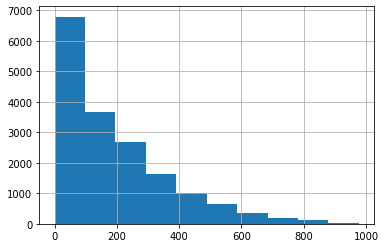

In [68]:
y_target.hist()

<AxesSubplot:>

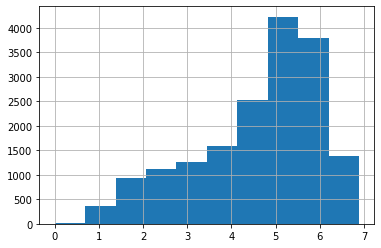

In [69]:
y_log_transform=np.log1p(y_target)
y_log_transform.hist()

In [73]:
y_target_log = np.log1p(y_target)
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target_log, test_size=0.3, random_state=0)

lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)

y_test_exp = np.expm1(y_test)
pred_exp = np.expm1(pred)
evaluate_regr(y_test_exp, pred_exp)

RMSLE: 1.0344394454294985, RMSE: 165.47356242539266, MAE: 110.13010574880879


<AxesSubplot:>

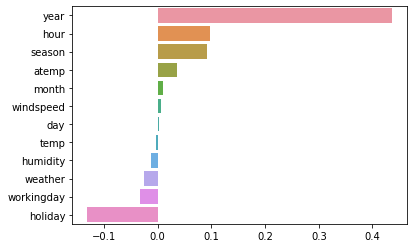

In [75]:
coef = pd.Series(lr_reg.coef_, index = X_features.columns)
coef_sort = coef.sort_values(ascending=False)
sns.barplot(x=coef_sort.values, y=coef_sort.index)

In [95]:
X_features_ohe = pd.get_dummies(X_features, columns=['year','month','day','hour','holiday','workingday','season','weather'])

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X_features_ohe, y_target_log, test_size=0.3, random_state=0)

In [97]:
def get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1=False):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    if is_expm1 :
        y_test = np.expm1(y_test)
        pred = np.expm1(pred)
    print('###', model.__class__.__name__,'###')
    evaluate_regr(y_test, pred)
    
lr_reg = LinearRegression()
ridge_reg = Ridge(alpha=10)
lasso_reg = Lasso(alpha=0.01)

for model in [lr_reg, ridge_reg, lasso_reg]:
    get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1=True)

### LinearRegression ###
RMSLE: 0.6140314047220973, RMSE: 95.8155851426041, MAE: 63.190515751513004
### Ridge ###
RMSLE: 0.6146219558979465, RMSE: 96.81486551592023, MAE: 63.67200483206384
### Lasso ###
RMSLE: 0.6661936858176092, RMSE: 116.22830219598359, MAE: 74.5645272954588


<AxesSubplot:>

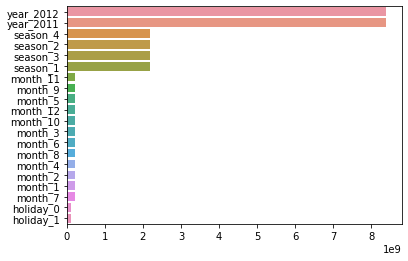

In [98]:
coef = pd.Series(lr_reg.coef_, index=X_features_ohe.columns)
coef_sort = coef.sort_values(ascending=False)[:20]
sns.barplot(x=coef_sort.values, y=coef_sort.index)

In [103]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [106]:
model = RandomForestRegressor(n_estimators=500)

In [109]:
get_model_predict(model, X_train.values, X_test.values, y_train.values, y_test.values, is_expm1=True)

### RandomForestRegressor ###
RMSLE: 0.3524049837524982, RMSE: 49.779957112234875, MAE: 30.647594210061804
